**Import Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Read In CSV File**

In [12]:
cs105_survey = pd.read_csv("Clean data CS105 Winter'26 Mini-Project Survey (Responses) 2.csv")
pd.set_option('display.max_columns', None)
cs105_survey.head()

,Timestamp,"What class are you filling out this survey for? Check all that apply. If none of the listed options apply, select ""Other"" and enter your class name (for example, CS105).",What is your current class standing?,Are you a transfer student?,"What is your major/minor? (If your major is not listed, please write it in ""Other.."")",What is your current cumulative GPA?,What is your age? Answer with a number only.,What is your ethnicity?,What gender do you identify as?,Select ALL that you identify with:,How many hours of sleep on average do you get? Select a answer for each of the following situations:\r\n [During finals week:],"Over the past 2 weeks, how often have you felt mentally overwhelmed or stressed\r\n1. Never\r\n2. Almost Never\r\n3. Sometimes\r\n4. Somewhat frequently\r\n5. E5day",Please indicate how much you agree with the following statements regarding the current job market in your major. (Each row should have one answer) [I feel optimistic about my career prospects in this field],"Scale: 1 very poorly, 2 poorly, 3 neutral, 4 well,5 very well How 4 are you able to concentrate during each of the following:\r\n [In-person lectures]","Scale: 1 very poorly, 2 poorly, 3 neutral, 4 well,5 very well How 4 are you able to concentrate during each of the following:\r\n [In-person discussions]","Scale: 1 very poorly, 2 poorly, 3 neutral, 4 well,5 very well How 4 are you able to concentrate during each of the following:\r\n [Online lectures or discussions]","Scale: 1 very poorly, 2 poorly, 3 neutral, 4 well,5 very well How 4 are you able to concentrate during each of the following:\r\n [Small study group sessions]","Scale: 1 very poorly, 2 poorly, 3 neutral, 4 well,5 very well How 4 are you able to concentrate during each of the following:\r\n [Exams]",How many coding languages would you say you’re proficient in?,What was the first programming language you learned?,Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Final project instead of exam],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Easy exams],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Friendly professor],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Accessible office hours],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Low workload],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [No required attendence],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Interested in material],Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Prepares for future job],What class(es) do you think prepared you most for the career field you want to pursue? CS courses,What class(es) do you think prepared you most for the career field you want to pursue? ENGINEERING,What class(es) do you think prepared you most for the career field you want to pursue? DS courses,What class(es) do you think prepared you most for the career field you want to pursue? Humanities,Think about your time at UCR. Which week during the quarter do you: [Start feeling burnout],Think about your time at UCR. Which week during the quarter do you: [Have sleep deprivation],Think about your time at UCR. Which week during the quarter do you: [Start feeling less confident in the material],Think about your time at UCR. Which week during the quarter do you: [Start feeling more confident in the material],Think about your time at UCR. Which week during the quarter do you: [Study the most],Think about your time at UCR. Which week during the quarter do you: [Enjoy the most],Choose the resources that has been most helpful in your success

**Heat Map**

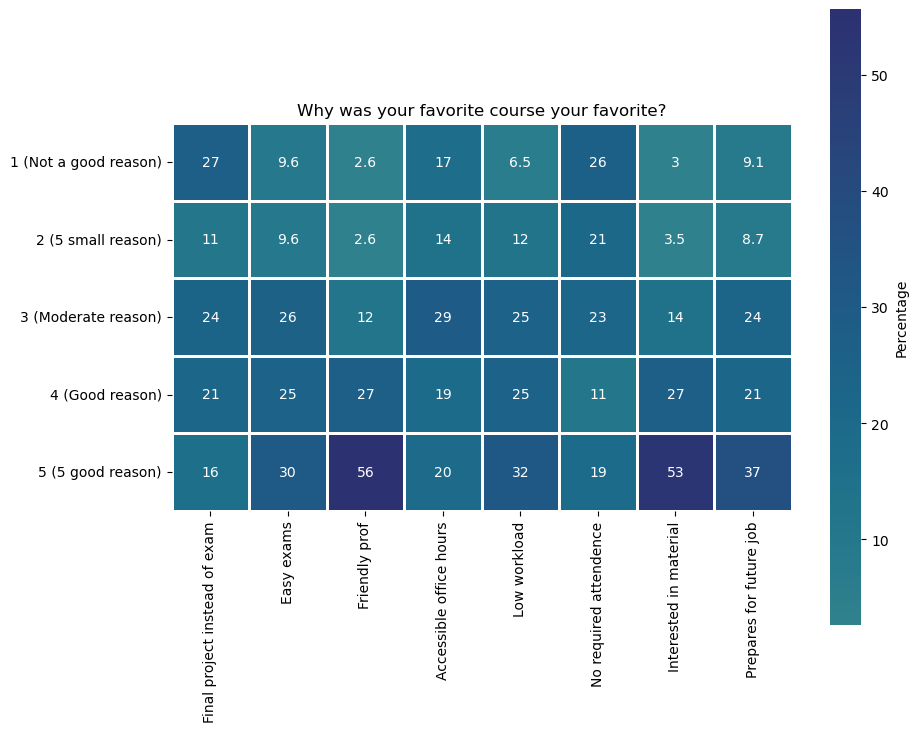

In [13]:
favorite_course = cs105_survey.loc[:, 
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Final project instead of exam]":
                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Prepares for future job]"
            ].copy()

favorite_course = favorite_course.rename(columns={"Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Final project instead of exam]":"Final project instead of exam",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Easy exams]":"Easy exams",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Friendly professor]":"Friendly prof",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Accessible office hours]":"Accessible office hours",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Low workload]":"Low workload",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [No required attendence]":"No required attendence",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Interested in material]":"Interested in material",
                                "Think about your favorite course (4 units). Why was it your favorite course? Rank the following reasons.\r\n [Prepares for future job]":"Prepares for future job"})

favorite_course = favorite_course.apply(pd.Series.value_counts, args=(1, 2)) * 100 

plt.figure(figsize=(10, 8))
plt.title("Why was your favorite course your favorite?")
sns.heatmap(data=favorite_course, center=0, cmap="crest", annot=True, square=True, linewidths=1, cbar_kws={"label":"Percentage"})
plt.show()


We can see from the data that the features that were most "hot" for answering the question "Why was your favorite course your favorite?" were having a Friendly Prof and being interested in the material. The features that were least correlated were "final project" over exam and "no required attendence".

**Parallel Coordinate Plot**

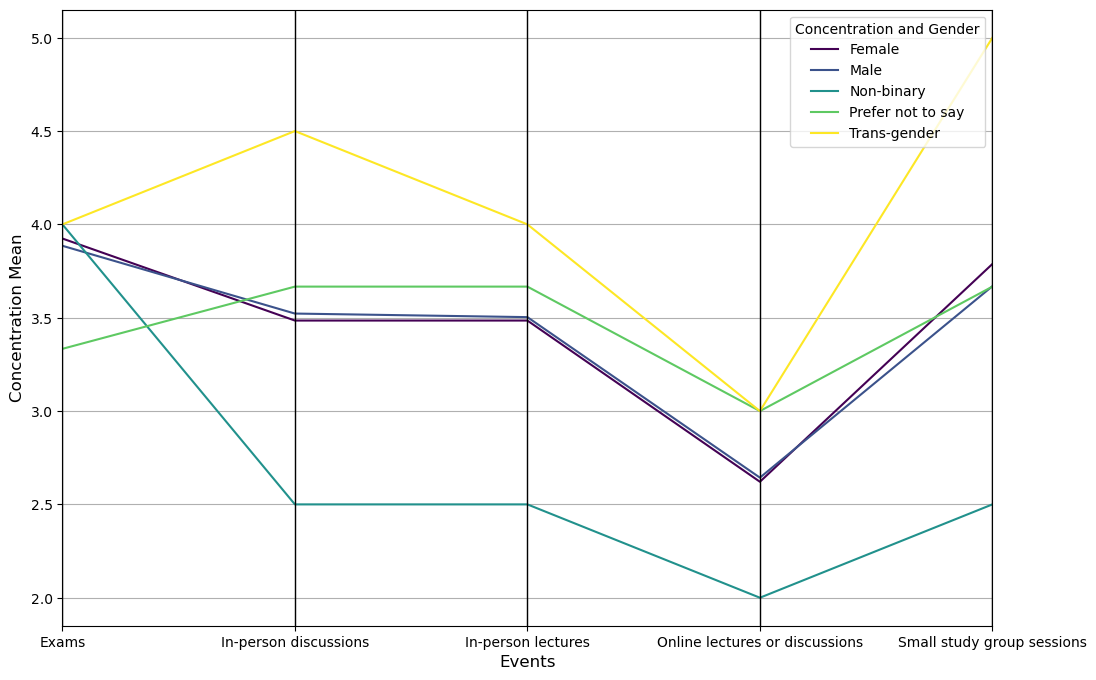

In [14]:
identity_concentration = cs105_survey.iloc[:, 13:18].copy()
identity_concentration["Identity"] = cs105_survey["What gender do you identify as?"]

identity_concentration = identity_concentration.rename(columns={identity_concentration.columns[0]:"In-person lectures",
                                                                identity_concentration.columns[1]:"In-person discussions",
                                                                identity_concentration.columns[2]:"Online lectures or discussions",
                                                                identity_concentration.columns[3]:"Small study group sessions",
                                                                identity_concentration.columns[4]:"Exams"})

identity_concentration_pivot = pd.pivot_table(data=identity_concentration, values=identity_concentration.loc[:, "In-person lectures":"Exams"], index="Identity", aggfunc="mean")
identity_concentration_pivot["Classes"] = identity_concentration_pivot.index

plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(identity_concentration_pivot, "Classes", colormap='viridis', alpha=1.0)
plt.xlabel('Events', fontsize=12)
plt.ylabel('Concentration Mean', fontsize=12)
plt.legend(title='Concentration and Gender', loc='upper right')
plt.show()

From the data we see that specifically for males and females there is almost no difference in how much they are able to concentrate in each event. Interestingly for non-binary, transgender, and "prefer not to say" they all differed by varying amounts. This could simply be from a lack of sample size though. Despite that we can see around the same trend for each gender, in which the concentration from in-person discussion to in-person lecture barely changes, then steeply drops when it comes to online lectures or discussions, and then rises during small study group sessions. We can see concentration is the highest usually during exams and lowest during online lecures or discussions.